In [ ]:
!pip install

In [ ]:
!pip install

In [ ]:
!pip install

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_data = np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,6],
    [7,5],
    [2,1],
    [8,9],
    [9,10],
    [6,12],
    [7,2],
    [6,10],
    [3,4]
])

y_data = np.array([0,0,1,1,1,0,1,1,1,1,1,0])

Label = ['Y', 'N']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=4)

model = RandomForestClassifier()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

x_test = np.array([
    [2,2]
])

#0이 포함된다는 의미
y_predict = model.predict(x_test)
print(Label[y_predict[0]])

0.875
0.75
Y


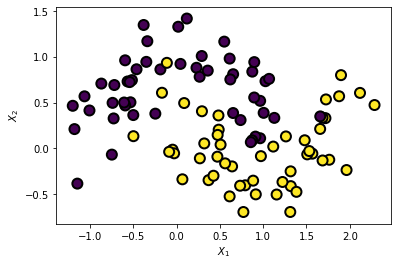

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=y, s=100,
           edgecolor='k', linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
                                                   
forest = RandomForestClassifier(n_estimators=5, random_state=2)
                                                    
forest.fit(X_train, y_train)

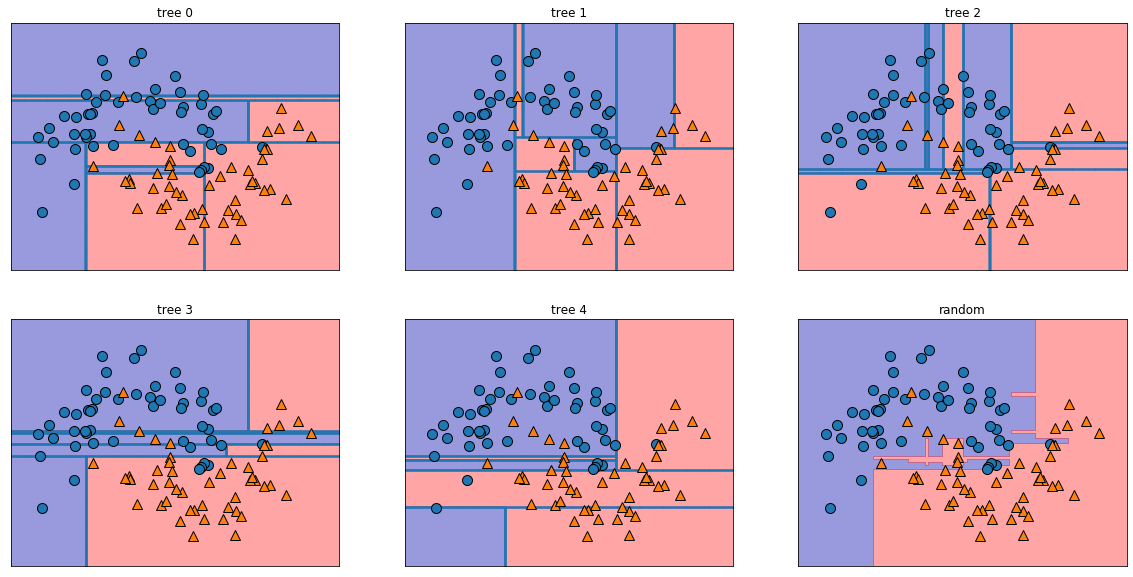

In [12]:
#지니인덱스와 엔트로피로 나누어 지는 것

import mglearn

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("random")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train, y_train)

print("train acc: {:.3f}".format(forest.score(X_train, y_train)))
print("test acc: {:.3f}".format(forest.score(X_test, y_test)))

train acc: 1.000
test acc: 0.972


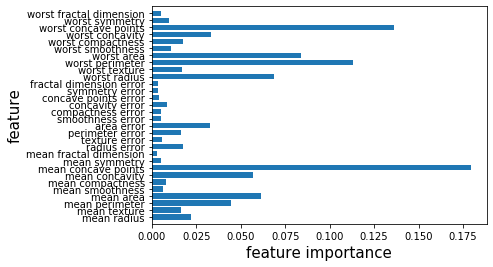

In [14]:
n_feature = cancer.data.shape[1]
index = np.arange(n_feature)

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)
plt.barh(index, forest.feature_importances_, align='center')
plt.yticks(index, cancer.feature_names)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [18]:
#import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris=datasets.load_iris()

In [ ]:
#print the label species(setosa, versicolor, virginica)
print(iris.target_names)

#print the names of the four features
print(iris.feature_names)

In [19]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
#import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [33]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy. How often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [34]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #feature
y=data['species']#Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [35]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.452748
petal length (cm)    0.411520
sepal length (cm)    0.108719
sepal width (cm)     0.027014
dtype: float64

In [36]:
#n_jobs(내컴퓨터에 코어를 쓰겠다)


from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]    
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 4, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs =-1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터: ", grid_cv.best_params_)
print("최고 예측 정확도: {:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.9619


In [37]:
from sklearn.ensemble import RandomForestRegressor #회귀트리(모델)
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import fetch_california_housing, load_boston # dataset
from sklearn.metrics import mean_squared_error #평균제곱오차

In [38]:
X, y = load_boston(return_X_y=True)
X.shape #(506, 13)
#x,y를 지정해주기 위해서

(506, 13)

In [39]:
boston = load_boston()
X = boston.data
y = boston.target
colnames = boston.feature_names #13개 칼럼 이름 가져올때
colnames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_train.shape #(354, 13)

(354, 13)

In [41]:
model = RandomForestRegressor()
model.fit(X = x_train, y= y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
modelrf = RandomForestRegressor(max_depth=3)
modelrf.fit(X = x_train, y = y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred = modelrf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('mse=', mse)
rmse = (np.sqrt(mse))
print('rmse :', rmse)

mse= 8.66046804403428
rmse : 2.9428673167566153


([<matplotlib.axis.YTick at 0x1e3b944cdc8>,
 <a list of 13 Text yticklabel objects>)

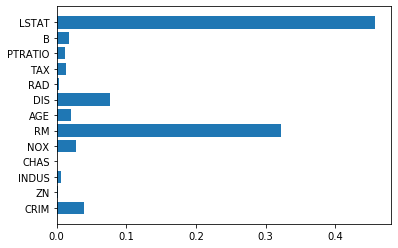

In [45]:
import matplotlib.pyplot as plt
imp = model.feature_importances_
imp
plt.barh(range(13), imp) #(x,y) 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(range(13), colnames)

In [49]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #회귀트리(모델)

wine_data = pd.read_csv(r'C:/Users/Playdata/OneDrive/Documents/11주차/목요일 최영진님/winequality-white.csv', delimiter =';', dtype=float)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [50]:
x_data = wine_data.iloc[:,0:-1]
y_data = wine_data.iloc[:,-1]

In [55]:
#데이터 행의 30%로 고정된 홀드 아웃 세트 구성
xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_data, test_size = 0.3, random_state = 531)

#MSE의 변화를 확인하기 위하여 앙상블의 크기 범위에서 랜덤 포레스트 트레이닝
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = RandomForestRegressor(n_estimators=iTrees,
                                       max_depth=depth, max_features=maxFeat,
                                       oob_score=False, random_state=531)
    wineRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))

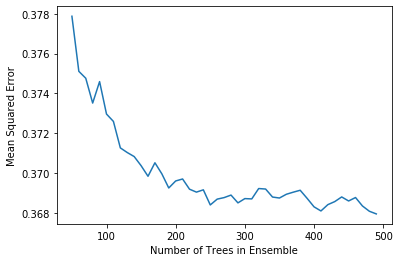

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
plt.show()

No handles with labels found to put in legend.


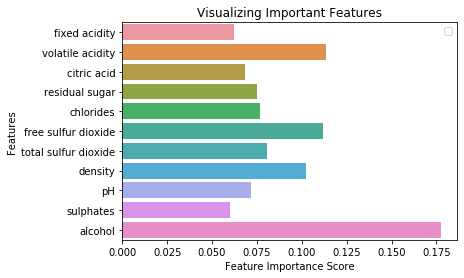

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

featureImportance = wineRFModel.feature_importances_
# Creating a bar plot
sns.barplot(x=featureImportance, y=x_data.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

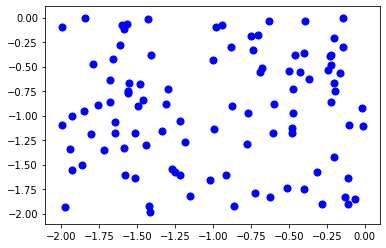

[1 1 2 0 0 2 0 0 2]
정확도 : 0.89
